In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

## Load dataset

In [2]:
data = pd.read_csv('dataset.csv', sep=';')
data.head()

,x1,x2,y
0,0.5,0.5,0
1,1.0,1.0,0
2,2.0,1.0,0
3,2.5,0.5,0
4,0.5,2.0,0


## Plot dataset

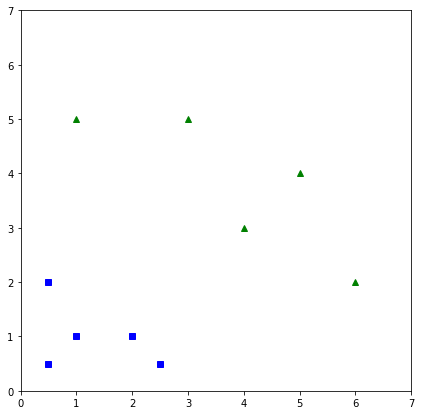

In [3]:
data_x = data[data.y==1]
data_o = data[data.y==0]

plt.figure(figsize=(7,7))
plt.ylim((0, 7))
plt.xlim((0, 7))
plt.plot(data_x.x1, data_x.x2, 'g^')
plt.plot(data_o.x1, data_o.x2, 'bs')
plt.show()

## Split to training and validation set

In [4]:
X = data[['x1', 'x2']]
y = data.y
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)

## Preprocessing - scale to around <0;1> range
In this example values of x1, x2 are close to <0;1> so this step is not required.

In [5]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

print(X_train)
print(X_val)

[[0.11111111 1.        ]
 [0.11111111 0.11111111]
 [1.         0.77777778]
 [0.77777778 0.55555556]
 [0.44444444 0.        ]
 [0.         0.        ]
 [0.55555556 1.        ]]
[[0.33333333 0.11111111]
 [1.22222222 0.33333333]
 [0.         0.33333333]]


## Use DecisionTreeClassifier as example model

In [6]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier().fit(X_train, y_train)

print(f"Decision Tree classifier accuracy on training set: {classifier.score(X_train, y_train):.2f}")
print(f"Decision Tree classifier accuracy on validation set: {classifier.score(X_val, y_val):.2f}")

Decision Tree classifier accuracy on training set: 1.00
Decision Tree classifier accuracy on validation set: 0.67
